<a href="https://colab.research.google.com/github/denisecammarota/qbio2021/blob/main/RNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
require(nlme) #no problems here

In [252]:
#install.packages("quantreg") #this takes quite a while 

In [253]:
require(quantreg) #now this is okay

# Static Patterns

In [254]:
gLV_Allee_01p1<-read.csv("gLV_0p1.csv", header=FALSE, dec=".")
masses<-read.csv("masses.csv", header=FALSE, dec=".")
gLV_Allee_01p1<-as.matrix(gLV_Allee_01p1)
masses<-as.matrix(masses)  
gLV_Allee_01p1[gLV_Allee_01p1<0.7]<-NaN

## Fitting the transient only

Warning message in matplot(1:100, gLV_Allee_01p1_transient, log = "y"):
“default 'pch' is smaller than number of columns and hence recycled”


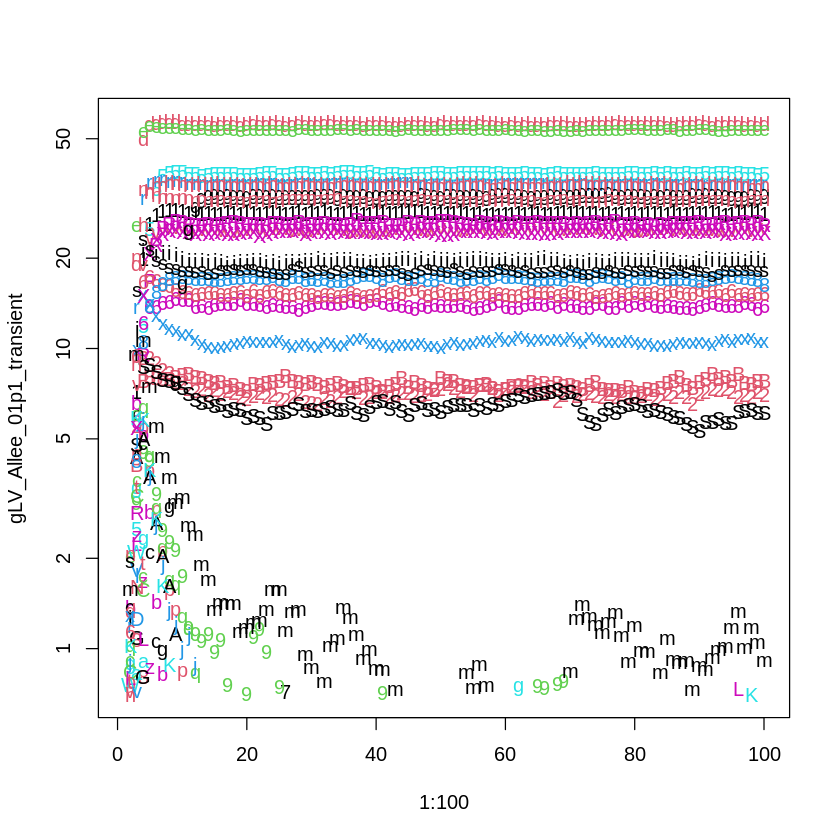

In [255]:
gLV_Allee_01p1_transient = gLV_Allee_01p1[1:100,]
matplot(1:100,gLV_Allee_01p1_transient,log="y")

Warning message in matplot(masses, t(gLV_Allee_01p1), log = "xy"):
“default 'pch' is smaller than number of columns and hence recycled”


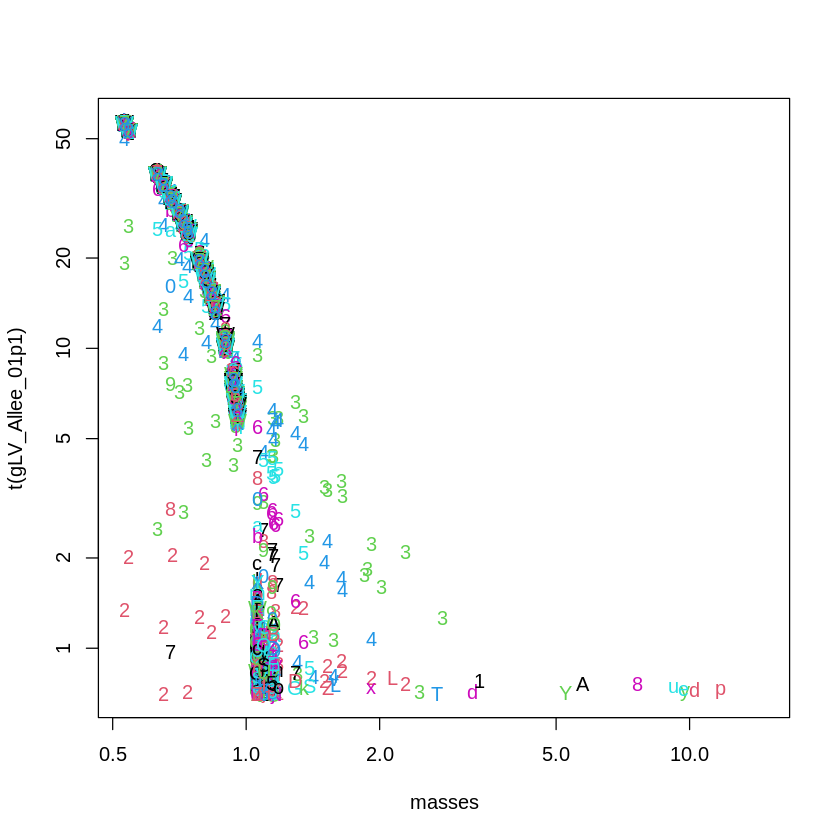

In [256]:
matplot(masses,t(gLV_Allee_01p1),log="xy")


Call:
lm(formula = logN_vec ~ logMvec)

Coefficients:
(Intercept)      logMvec  
      1.810       -3.874  

Call:
rq(formula = logN_vec ~ logMvec, tau = 0.99)

Coefficients:
(Intercept)     logMvec 
   2.591261   -2.301386 

Degrees of freedom: 2156 total; 2154 residual


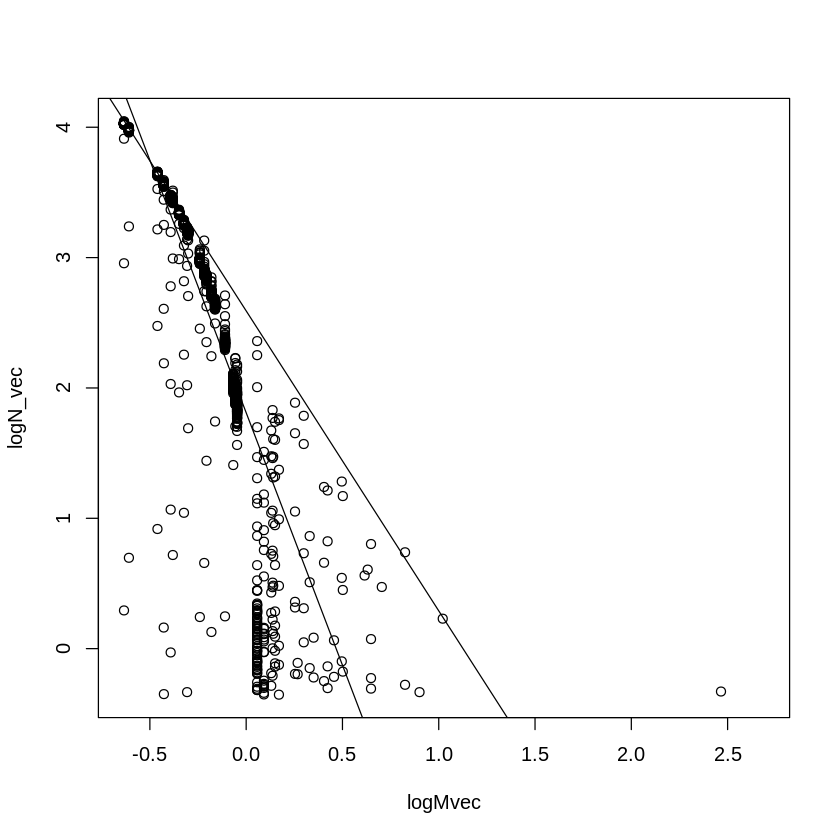

In [257]:
logN_mat = log(gLV_Allee_01p1_transient)
logM = log(masses)
TimeSteps = 100
logN_vec<-as.numeric(t(logN_mat))
logMvec<-rep(logM, TimeSteps) # TimeSteps is the number of time step of the abundance matrix
fit_sizeabundance<-lm(logN_vec~logMvec)
plot(logMvec, logN_vec)
fit_sizeabundance<-lm(logN_vec~logMvec)
abline(fit_sizeabundance)
fit_sizeabundance_q = rq(logN_vec~logMvec,tau = 0.99)
abline(fit_sizeabundance_q)
print(fit_sizeabundance)
print(fit_sizeabundance_q)

## Fitting the equilibrium

Warning message in matplot(900:1000, gLV_Allee_01p1_equilibrium, log = "y"):
“default 'pch' is smaller than number of columns and hence recycled”


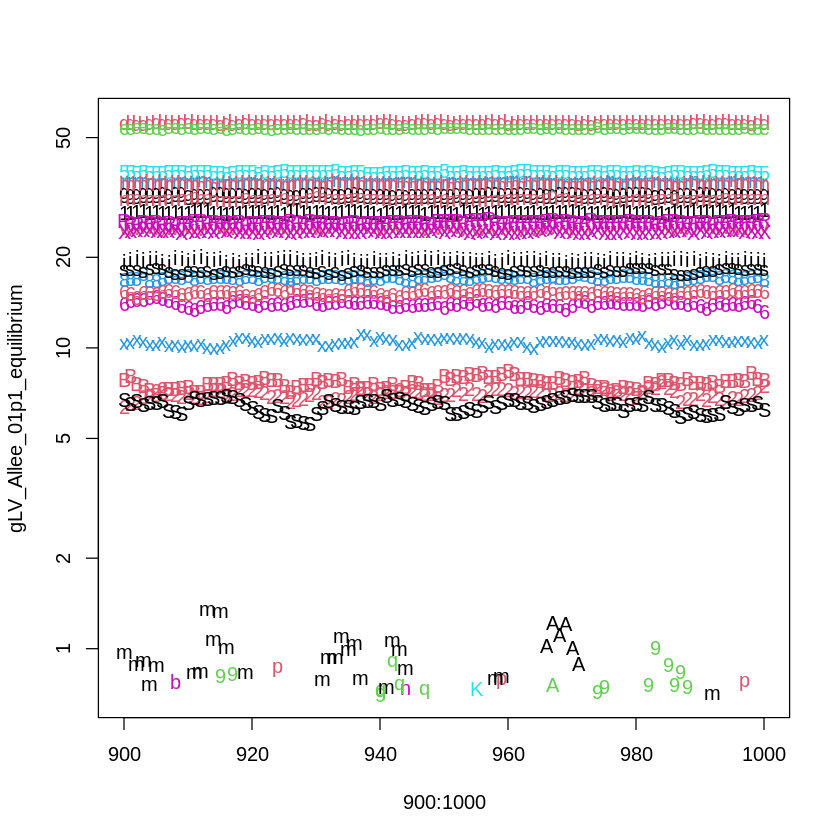

In [259]:
gLV_Allee_01p1_equilibrium = gLV_Allee_01p1[900:1000,]
matplot(900:1000,gLV_Allee_01p1_equilibrium,log="y")

Warning message in matplot(masses, t(gLV_Allee_01p1_equilibrium), log = "xy"):
“default 'pch' is smaller than number of columns and hence recycled”


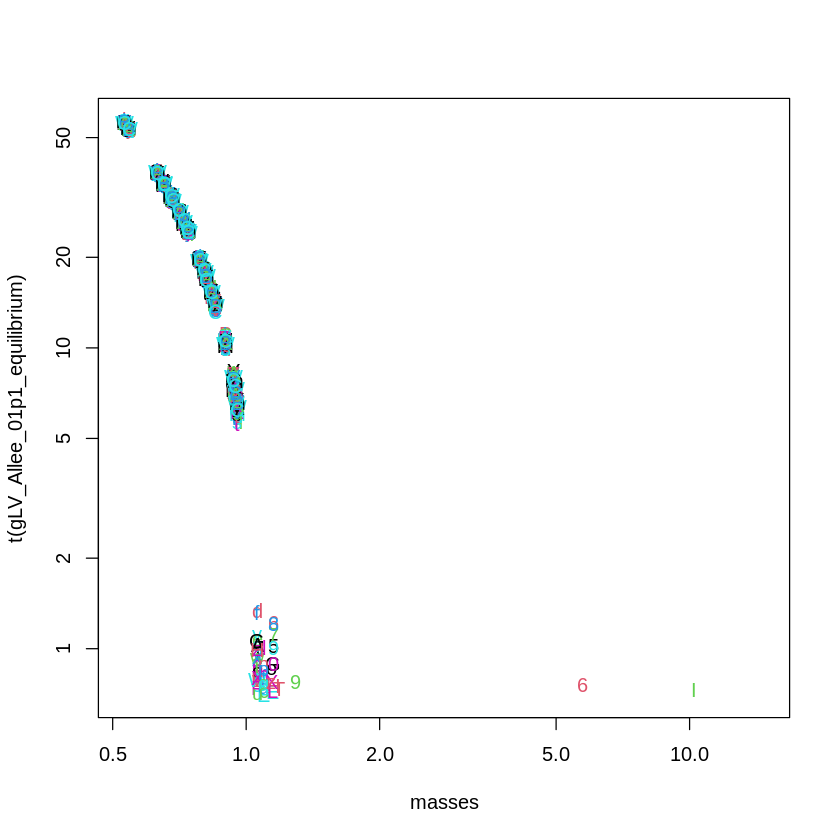

In [260]:
matplot(masses,t(gLV_Allee_01p1_equilibrium),log="xy")


Call:
lm(formula = logN_vec ~ logMvec)

Coefficients:
(Intercept)      logMvec  
      1.896       -3.775  

Call:
rq(formula = logN_vec ~ logMvec, tau = 0.99)

Coefficients:
(Intercept)     logMvec 
   2.617607   -2.241626 

Degrees of freedom: 2074 total; 2072 residual


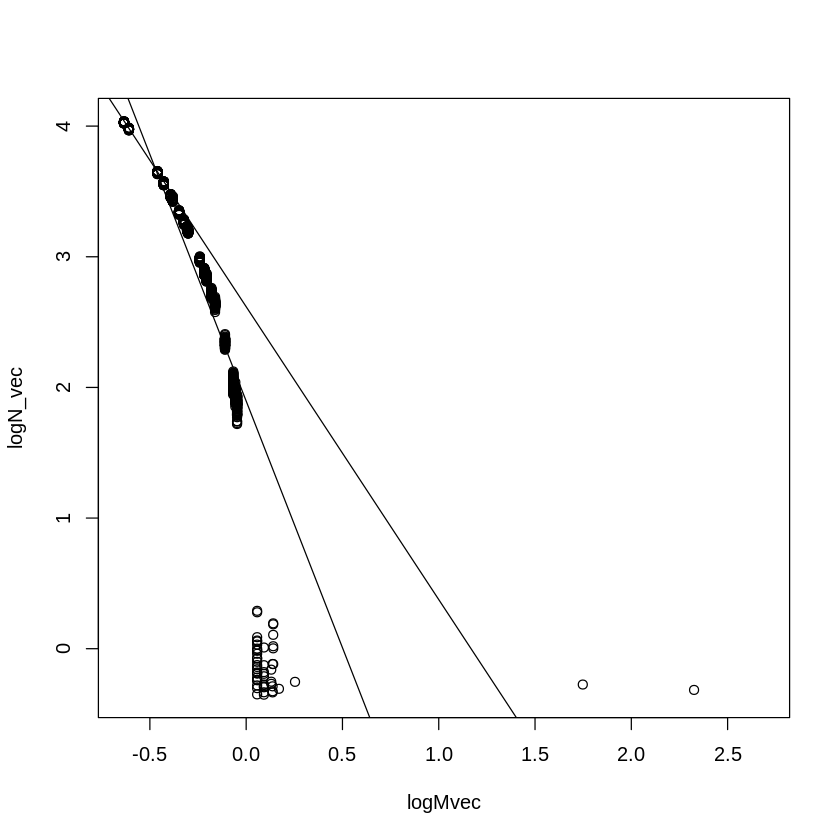

In [261]:
logN_mat = log(gLV_Allee_01p1_equilibrium)
logM = log(masses)
TimeSteps = 101
logN_vec<-as.numeric(t(logN_mat))
logMvec<-rep(logM, TimeSteps) # TimeSteps is the number of time step of the abundance matrix
fit_sizeabundance<-lm(logN_vec~logMvec)
plot(logMvec, logN_vec)
fit_sizeabundance<-lm(logN_vec~logMvec)
abline(fit_sizeabundance)
fit_sizeabundance_q = rq(logN_vec~logMvec,tau = 0.99)
abline(fit_sizeabundance_q)
print(fit_sizeabundance)
print(fit_sizeabundance_q)

# Laplace distribution

In [191]:
install.packages("VGAM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("VGAM"):
“installation of package ‘VGAM’ had non-zero exit status”


In [192]:
require(VGAM)

In [193]:
r_all<-apply(logN_mat,2, diff)

L_phyto1<-as.numeric(r_all); 
L_phyto<-L_phyto1[which(!is.na(L_phyto1))]

In [194]:
Fit_Control<-vglm.control(checkwz = TRUE, Check.rank = TRUE, Check.cm.rank = TRUE,criterion = "coefficients", epsilon = 1e-09, half.stepsizing = TRUE, 
          maxit = 150, noWarning = FALSE, stepsize = 0.1)

In [195]:
Lap_phyto= vglm(L_phyto~1, laplace, data.frame(Phyto=L_phyto), trace = TRUE, crit = "l", control=Fit_Control) # Ajusto dist de laplace a serie de datos
# SCALE
Coef(Lap_phyto)[2]

Warning message in vglm.fitter(x = x, y = y, w = w, offset = offset, Xm2 = Xm2, :
“convergence not obtained in 150 IRLS iterations”


scale 
0.02940408

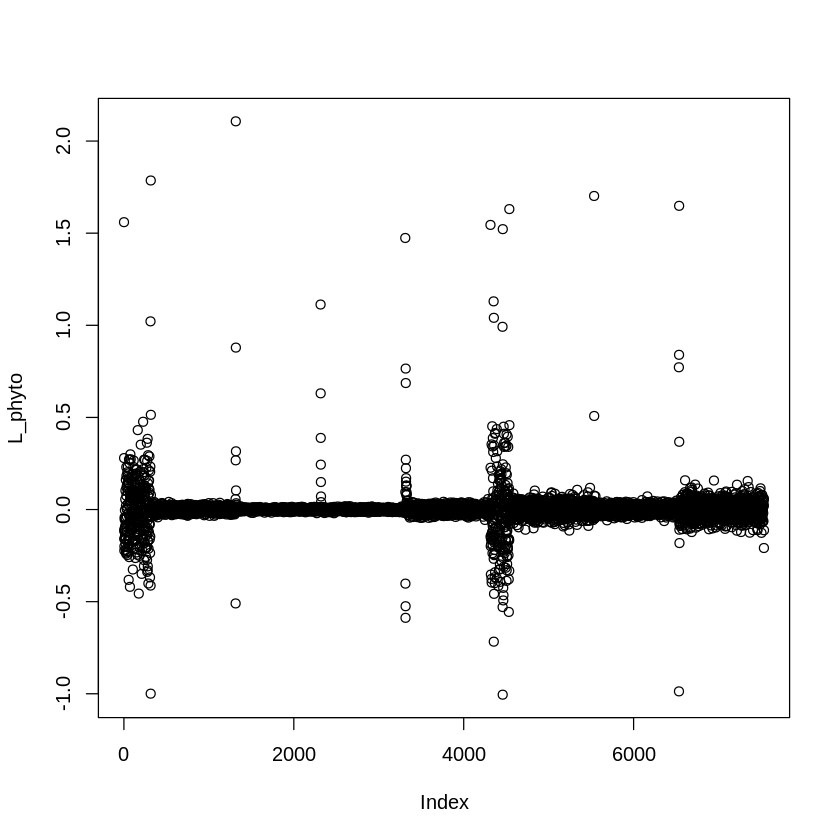

In [196]:
plot(L_phyto)